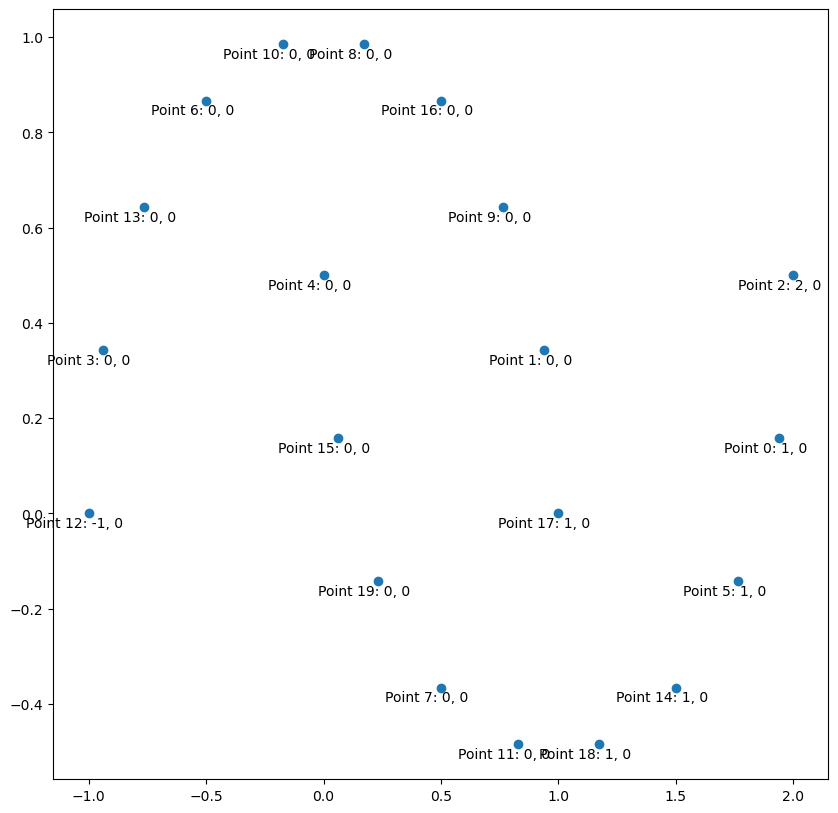

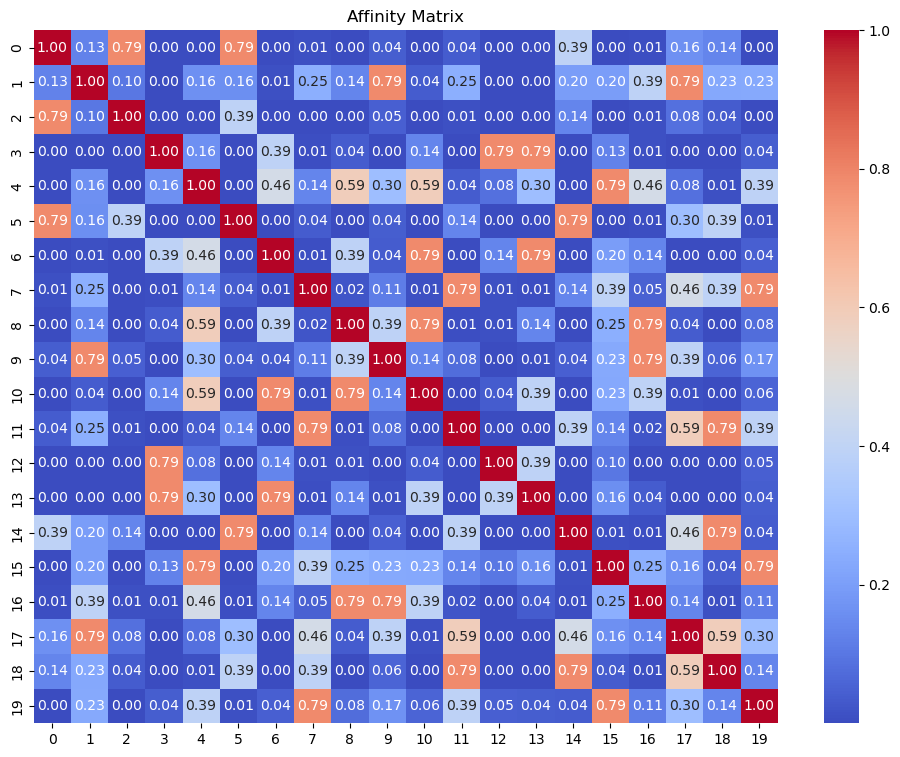

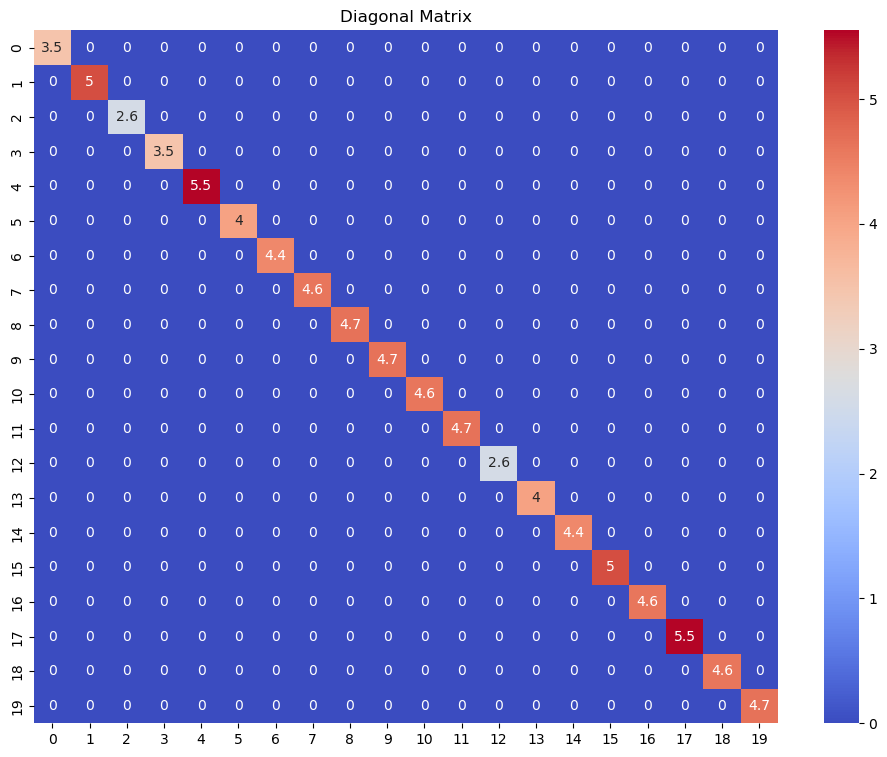

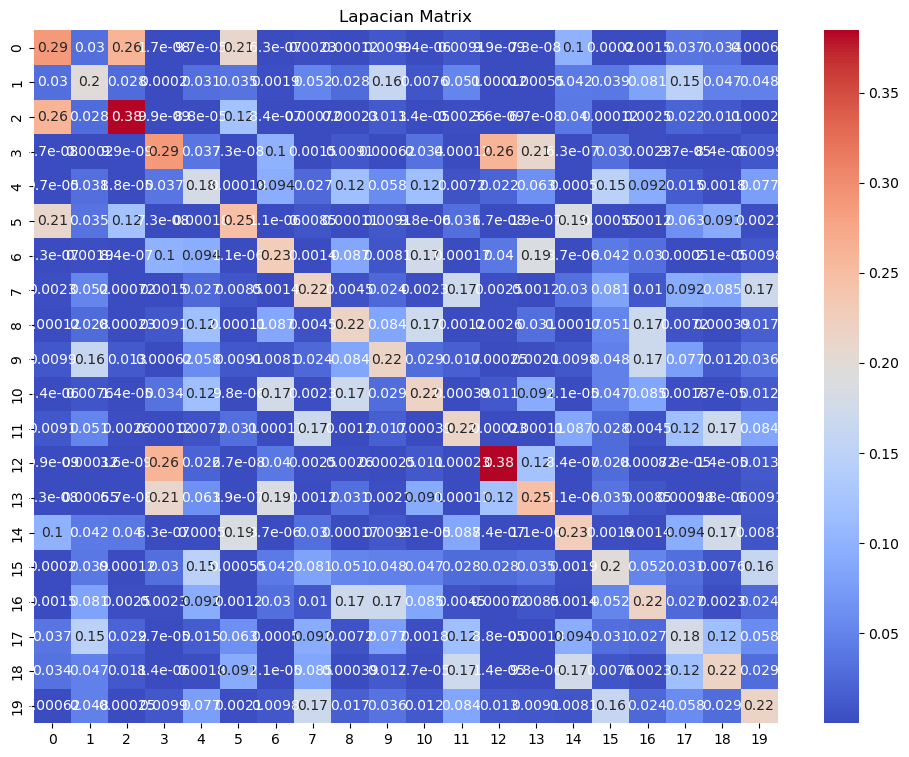

num_clusters largest eigenvectors
[[-0.2   -0.319]
 [-0.241 -0.097]
 [-0.173 -0.288]
 [-0.2    0.319]
 [-0.252  0.18 ]
 [-0.215 -0.312]
 [-0.224  0.28 ]
 [-0.23  -0.103]
 [-0.231  0.176]
 [-0.231  0.01 ]
 [-0.229  0.234]
 [-0.231 -0.176]
 [-0.173  0.288]
 [-0.215  0.312]
 [-0.224 -0.28 ]
 [-0.241  0.097]
 [-0.23   0.103]
 [-0.252 -0.18 ]
 [-0.229 -0.234]
 [-0.231 -0.01 ]]
normalized num_clusters largest eigenvectors
[[-0.53119211 -0.84725141]
 [-0.92767815 -0.37338083]
 [-0.51493341 -0.85723018]
 [-0.53119211  0.84725141]
 [-0.81373347  0.58123819]
 [-0.56742455 -0.82342539]
 [-0.62469505  0.78086881]
 [-0.91266248 -0.40871407]
 [-0.79543172  0.60604322]
 [-0.9990643   0.04324954]
 [-0.69942986  0.71470125]
 [-0.79543172 -0.60604322]
 [-0.51493341  0.85723018]
 [-0.56742455  0.82342539]
 [-0.62469505 -0.78086881]
 [-0.92767815  0.37338083]
 [-0.91266248  0.40871407]
 [-0.81373347 -0.58123819]
 [-0.69942986 -0.71470125]
 [-0.9990643  -0.04324954]]
[1 1 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 1 

/Users/tonytam/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


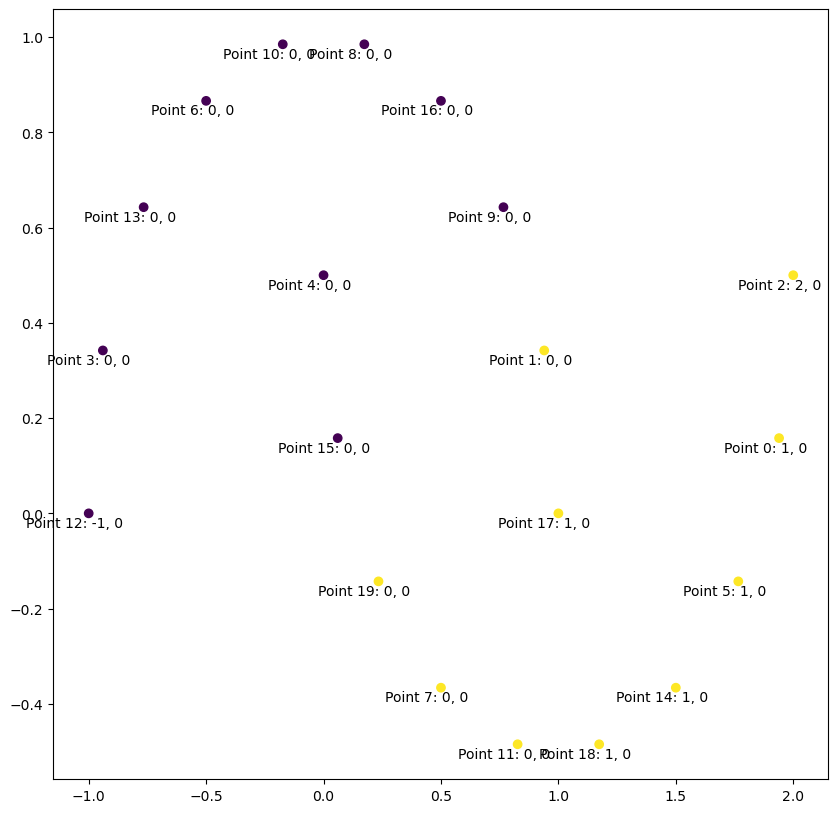

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from sklearn.gaussian_process.kernels import RBF

#Macros:
num_clusters = 2

# Generate a dataset
X, _ = make_moons(n_samples=20, noise=0, random_state=0)

#Step 1
# Compute the RBF kernel of X
#greater length scale -> lower gamma -> points further apart are considered similar
#lower length scale -> higher gamma -> points closer are considered similar
# gamma =  1/length_scale
kernel = RBF(length_scale=0.5) 

# compute the rbf kernel with the custom gamma value
affinity_matrix = kernel(X)


# Create a scatter plot of the dataset
plt.figure(figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1])

# Label each data point with its coordinates
for i, coord in enumerate(X):
    coord_int = coord.astype(int)
    plt.annotate(f'Point {i}: {coord_int[0]}, {coord_int[1]}', 
                 (coord[0], coord[1]), 
                 textcoords="offset points", 
                 xytext=(-10,-10), 
                 ha='center')

plt.show()
# Create an affinity matrix using RBF kernel
# affinity_matrix = rbf_kernel(X)

A = pd.DataFrame(affinity_matrix)
plt.figure(figsize=(12, 9))
sns.heatmap(A, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Affinity Matrix")  # Add title to the plot
plt.show()

#Step 2
# Compute the degree matrix

D = np.diag(np.round(np.sum(affinity_matrix, axis=1), 2))

# Create a heatmap of the degree matrix
plt.figure(figsize=(12, 9))

sns.heatmap(D, annot=True, cmap='coolwarm', cbar=True)
plt.title("Diagonal Matrix")  # Add title to the plot
plt.show()

D_inverse = np.linalg.inv(D)
D_powered = np.sqrt(D_inverse)
L = np.matmul(D_powered, A)
L = np.matmul(L, D_powered)

# Create a heatmap of the degree matrix
plt.figure(figsize=(12, 9))

sns.heatmap(L, annot=True, cmap='coolwarm', cbar=True)
plt.title("Lapacian Matrix")  # Add title to the plot
plt.show()

#Step 3
eigenvalues, eigenvectors = np.linalg.eig(L)
eigenvectors = eigenvectors.round(decimals=3)
eigenvalues = eigenvalues.round(decimals=2)
eigenvalues = np.sort(eigenvalues)[::-1] #in descending order
def near(a, b, rtol = 1e-5, atol = 1e-8): #https://stackoverflow.com/questions/11953867/how-do-i-find-out-eigenvectors-corresponding-to-a-particular-eigenvalue-of-a-mat
    return np.abs(a-b)<(atol+rtol*np.abs(b))

# Y = np.empty((0, eigenvectors.shape[1]), float) # Initialize an empty array with appropriate shape
# for i in range(num_clusters):
#     Y = np.vstack((Y, eigenvectors[near(eigenvalues, eigenvalues[i])]))

# Step 4
Y = eigenvectors[:,:num_clusters]
print("num_clusters largest eigenvectors")
print(Y)
Y_normalized = normalize(Y, axis=1, norm='l2') #l2 is euclidean normalization, unit length of 1 guaranteed
print("normalized num_clusters largest eigenvectors")

print(Y_normalized)

# print(Y1)

#Step 5

# Create a KMeans object with k clusters and fit the data.
kmeans = KMeans(n_clusters=num_clusters, max_iter=1000)
kmeans.fit(Y_normalized)

# The cluster assignments for each data point are stored in kmeans.labels_.
labels = kmeans.labels_
print(labels)

#Step 6
# Create a scatter plot of the dataset
plt.figure(figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1], c=labels)

# Label each data point with its coordinates
for i, coord in enumerate(X):
    coord_int = coord.astype(int)
    plt.annotate(f'Point {i}: {coord_int[0]}, {coord_int[1]}', 
                 (coord[0], coord[1]), 
                 textcoords="offset points", 
                 xytext=(-10,-10), 
                 ha='center')

plt.show()